In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

#makes plots appear in the notebook
%matplotlib inline

import pandas_datareader as pdr
from datetime import datetime
import requests
from io import StringIO

In [2]:
url = "http://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton.csv"

In [3]:
source=requests.get(url).text

In [4]:
poll_data=StringIO(source)

In [5]:
poll_df=pd.read_csv(poll_data)

In [6]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                1522 non-null   object 
 1   Start Date              1522 non-null   object 
 2   End Date                1522 non-null   object 
 3   Entry Date/Time (ET)    1522 non-null   object 
 4   Number of Observations  1013 non-null   float64
 5   Population              1522 non-null   object 
 6   Mode                    1522 non-null   object 
 7   Trump                   1522 non-null   float64
 8   Clinton                 1522 non-null   float64
 9   Other                   1098 non-null   float64
 10  Undecided               1460 non-null   float64
 11  Pollster URL            1522 non-null   object 
 12  Source URL              1522 non-null   object 
 13  Partisan                1522 non-null   object 
 14  Affiliation             1522 non-null   

In [7]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


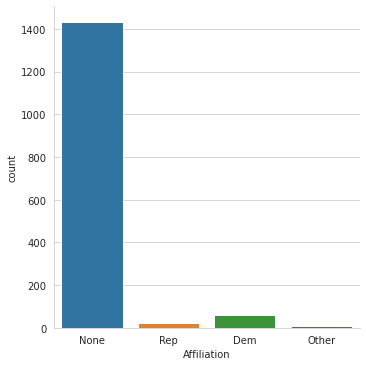

In [8]:
sns.catplot(x='Affiliation',data=poll_df,kind='count')

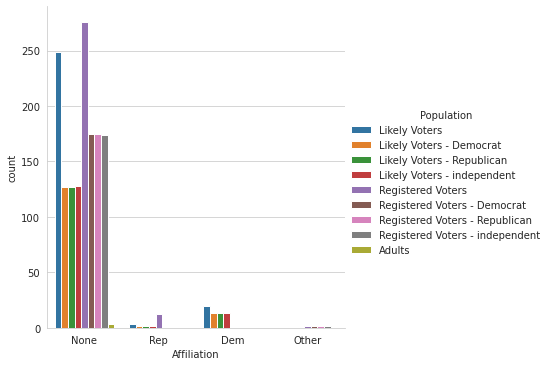

In [9]:
sns.catplot(x='Affiliation',data=poll_df,kind='count', hue='Population')

In [10]:
avg=pd.DataFrame(poll_df.mean())
avg.drop('Number of Observations', axis=0, inplace=True)
avg.drop('Question Iteration', axis=0, inplace=True)

In [11]:
avg.head()

,0
Trump,40.643890
Clinton,42.733903
Other,5.806011
Undecided,9.315068


In [12]:
std=pd.DataFrame(poll_df.std())
std.drop('Number of Observations', axis=0, inplace=True)
std.drop('Question Iteration', axis=0, inplace=True)

In [13]:
std.head()

,0
Trump,23.566390
Clinton,25.298731
Other,5.009533
Undecided,6.253118


<AxesSubplot:>

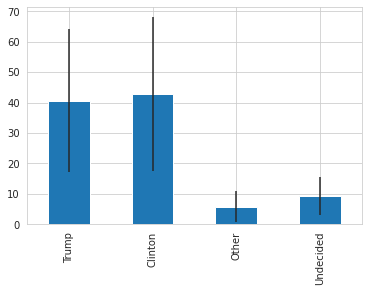

In [14]:
avg.plot(yerr=std,kind='bar', legend=False)

In [15]:
poll_avg=pd.concat([avg,std],axis=1)
poll_avg.columns=['Average','STD']

In [16]:
poll_avg

,Average,STD
Trump,40.643890,23.566390
Clinton,42.733903,25.298731
Other,5.806011,5.009533
Undecided,9.315068,6.253118


In [17]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


/opt/Miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='End Date'>

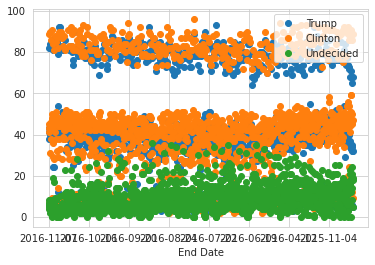

In [18]:
poll_df.plot(x='End Date',y=['Trump','Clinton','Undecided'],linestyle='', marker='o')

In [19]:
poll_df['difference']=(poll_df.Clinton-poll_df.Trump)/100

In [20]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,difference
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.04
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.83
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.75
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.05
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1,-0.02


In [21]:
poll_df=poll_df.groupby(['Start Date'],as_index=False).mean()
#basically sort by start data, give me the mean, but retain the index, so we can resort

In [22]:

poll_df.head()

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,difference
0,2015-05-19,1046.00,34.25,48.75,2.5,14.00,1.0,0.1450
1,2015-06-20,420.75,35.00,47.25,NaN,17.75,1.0,0.1225
2,2015-06-21,1005.00,34.00,51.00,3.0,12.00,1.0,0.1700
3,2015-06-26,890.00,36.75,57.00,6.0,0.00,1.0,0.2025
4,2015-07-09,499.25,35.25,49.50,NaN,16.00,1.0,0.1425


/opt/Miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Start Date'>

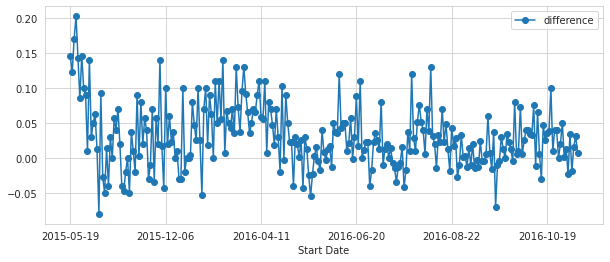

In [23]:
poll_df.plot('Start Date','difference', figsize=(10,4),marker='o')


In [24]:
poll_df['rolldiff']=poll_df['difference'].rolling(7,center=True).mean()
poll_df.head(10)

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,difference,rolldiff
0,2015-05-19,1046.000000,34.25,48.750,2.50,14.00,1.0,0.14500,NaN
1,2015-06-20,420.750000,35.00,47.250,NaN,17.75,1.0,0.12250,NaN
2,2015-06-21,1005.000000,34.00,51.000,3.00,12.00,1.0,0.17000,NaN
3,2015-06-26,890.000000,36.75,57.000,6.00,0.00,1.0,0.20250,0.144821
4,2015-07-09,499.250000,35.25,49.500,NaN,16.00,1.0,0.14250,0.138393
5,2015-07-20,702.333333,38.75,47.250,NaN,13.75,1.0,0.08500,0.133750
6,2015-07-22,931.000000,40.00,54.625,3.75,5.60,1.0,0.14625,0.110893
7,2015-07-23,1011.666667,37.75,47.750,3.50,11.00,1.0,0.10000,0.101964
8,2015-07-26,950.000000,40.00,49.000,NaN,12.00,1.0,0.09000,0.085893
9,2015-07-31,3477.000000,49.00,50.000,NaN,NaN,1.0,0.01000,0.080893


/opt/Miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Start Date'>

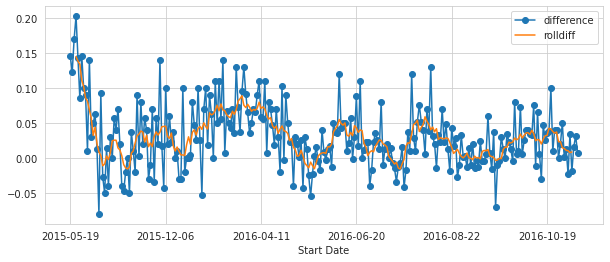

In [25]:
ax=poll_df.plot('Start Date','difference', figsize=(10,4),marker='o')
poll_df.plot('Start Date','rolldiff',figsize=(10,4),ax=ax)

In [26]:
#finding the index number for the debates
row_in=0
debateindex=[]
for date in poll_df['Start Date']:
    if date=='2016-09-26':
        debateindex.append(row_in)
        row_in +=1
    else:
        row_in+=1
        
row_in=0

for date in poll_df['Start Date']:
    if date[0:9]=='2016-10-08':
            debateindex.append(row_in)
            row_in +=1
    else:
            row_in +=1
            
row_in=0

for date in poll_df['Start Date']:
    if date[0:9]=='2016-10-19':
            debateindex.append(row_in)
            row_in +=1
    else:
            row_in +=1

print (debateindex)


[227]


In [27]:
#finding the zoom in for the x axis to encompass the debates
row_in=0
xlimit=[]

for date in poll_df['Start Date']:
    if date[0:7]=='2016-09':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in+=1
        
print (min(xlimit))
print (max(xlimit))

209
231


/opt/Miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


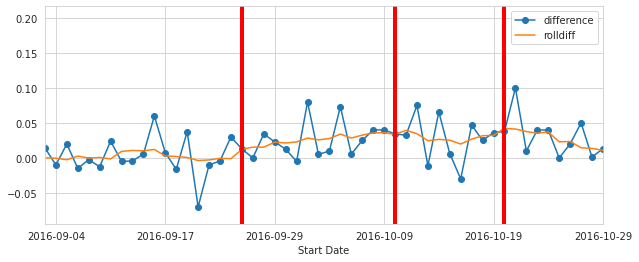

In [28]:
ax=poll_df.plot('Start Date','difference', figsize=(10,4),marker='o',xlim=(209,260))
poll_df.plot('Start Date','rolldiff',figsize=(10,4),ax=ax)

#debate on sept 26
plt.axvline(x=227,linewidth=4,color='red')
#debate on oct 9
plt.axvline(x=227+14,linewidth=4,color='red')
#debate on oct 19
plt.axvline(x=227+14+10,linewidth=4,color='red')